<a href="https://colab.research.google.com/github/travislatchman/Face-Recognition-Classification-Algorithms/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import scipy.io


In [ ]:

# set random seed for reproducibility
np.random.seed(42)


In [ ]:
# import the file YaleB-32x32.mat
YaleB = scipy.io.loadmat('YaleB_32x32.mat')


In [ ]:
# Access variables
fea = YaleB['fea']  # every row is a face
gnd = YaleB['gnd'].ravel()  # labels


In [ ]:

# define range of m values to try
m_values = [10, 20, 30, 40, 50]

# initialize variables to store classification errors for each value of m
classification_errors = []


In [ ]:

# loop over m values
for m in m_values:
    # randomly select m images per individual to form the training set
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    for label in np.unique(gnd):
        label_indices = np.where(gnd == label)[0]
        np.random.shuffle(label_indices)
        train_indices = label_indices[:m]
        test_indices = label_indices[m:]
        train_data.append(fea[train_indices])
        train_labels.append(gnd[train_indices])
        test_data.append(fea[test_indices])
        test_labels.append(gnd[test_indices])
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # apply SVM to training data
    svm = SVC(kernel='linear')
    svm.fit(train_data, train_labels)

    # predict test set labels
    pred_labels = svm.predict(test_data)

    # calculate classification error rate
    classification_error_rate = np.sum(
        pred_labels != test_labels) / len(test_labels) * 100

    # store classification error rate
    classification_errors.append(classification_error_rate)


In [ ]:
classification_errors


[28.56440511307768,
 12.515114873035065,
 8.712715855572998,
 8.165548098434003,
 7.003891050583658]

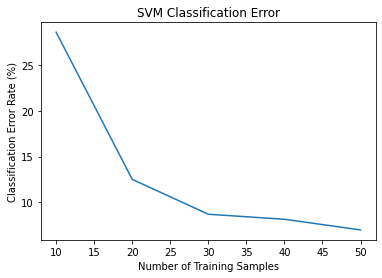

In [ ]:

# plot Classification Error Rate vs Number of Trainings Samples curves
plt.plot(m_values, classification_errors)
plt.xlabel('Number of Training Samples')
plt.ylabel('Classification Error Rate (%)')
plt.title('SVM Classification Error')
plt.show()
